In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [83]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import ElasticNet

In [102]:
matrix_df = pd.read_csv("../Data/matrix.csv")
target_df = pd.read_csv("../Data/target.csv", header=None)
test_2 = pd.read_csv("../Data/test_2.csv")
final_train = pd.read_csv("../Data/final_train.csv")

In [103]:
test_2.shape

(1431, 74)

In [6]:
num_cols = ['LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','YrSold']
cat_cols = [i for i in matrix_df.columns if i not in num_cols]

In [105]:
features_dummies = pd.get_dummies(matrix_df, columns=cat_cols, drop_first=True)
features_dummies_test = pd.get_dummies(test_2, columns=cat_cols, drop_first=True)

In [106]:
cols = features_dummies.columns
cols

Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=1750)

In [107]:
col1= features_dummies_test.columns
col1

Index(['LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=1721)

In [108]:
cols.difference(col1)

Index(['BedroomAbvGr_8', 'BsmtFullBath_1', 'BsmtFullBath_2', 'BsmtFullBath_3',
       'BsmtHalfBath_1', 'BsmtHalfBath_2', 'Condition2_RRAe',
       'Condition2_RRAn', 'Condition2_RRNn', 'Electrical_Mix',
       'Exterior1st_CBlock', 'Exterior1st_ImStucc', 'Exterior1st_Stone',
       'Exterior2nd_Other', 'GarageCars_1', 'GarageCars_2', 'GarageCars_3',
       'GarageCars_4', 'GarageQual_Fa', 'Heating_GasA', 'Heating_OthW',
       'HouseStyle_2.5Fin', 'KitchenAbvGr_3', 'OverallQual_2',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'TotRmsAbvGrd_14', 'Unnamed: 0_1013', 'Unnamed: 0_1029',
       'Unnamed: 0_1116', 'Unnamed: 0_1132', 'Unnamed: 0_1150',
       'Unnamed: 0_1197', 'Unnamed: 0_1226', 'Unnamed: 0_1402',
       'Unnamed: 0_1444', 'Unnamed: 0_1459', 'Unnamed: 0_231',
       'Unnamed: 0_246', 'Unnamed: 0_422', 'Unnamed: 0_455', 'Unnamed: 0_485',
       'Unnamed: 0_532', 'Unnamed: 0_544', 'Unnamed: 0_581', 'Unnamed: 0_660',
       'Unnamed: 0_691', 'Unnamed: 0_

In [109]:
missing_cols = set( features_dummies.columns ) - set( features_dummies_test.columns )
for c in missing_cols:
    features_dummies_test[c] = 0
features_dummies_test = features_dummies_test[features_dummies.columns]

In [110]:
features_dummies_test.shape

(1431, 1750)

In [111]:
features_dummies.shape

(1446, 1750)

In [112]:
target_df.shape

(1446, 1)

In [113]:
X_train, X_test, y_train, y_test = train_test_split(features_dummies, target_df, random_state = 42)

# Ridge Regression

In [114]:
ridge_pipe = Pipeline([('scaler',StandardScaler()), ('ridge', Ridge())])

In [115]:
ridge_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [116]:
ridge_pipe.score(X_train, y_train)

0.99999993102219331

In [117]:
ridge_pipe.score(X_test, y_test)

0.8933039352724137

# Lasso Regression

In [118]:
Lasso_pipe = Pipeline([('scaler',StandardScaler()), ('lasso', Lasso())])

In [119]:
Lasso_pipe.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [120]:
Lasso_pipe.score(X_train, y_train)

0.99999985621859044

In [121]:
Lasso_pipe.score(X_test, y_test)

0.77909391996262845

Ridge and Lasso are both linear models. The scores give us the R-squared value of the train and validation data using the same parameters with the fit done on the training data.

# KNN

In [122]:
KNN_pipe = Pipeline([('scaler',StandardScaler()), ('knn', KNeighborsRegressor())])

In [123]:
KNN_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('knn', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'))])

In [124]:
KNN_pipe.score(X_train, y_train)

0.80539099597651309

In [125]:
KNN_pipe.score(X_test, y_test)

0.70806703769834267

# Decision Tree

In [126]:
Dtree_pipe = Pipeline([('scaler',StandardScaler()), ('dtree', DecisionTreeRegressor())])

In [127]:
Dtree_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('dtree', DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'))])

In [128]:
Dtree_pipe.score(X_train, y_train)

1.0

In [129]:
Dtree_pipe.score(X_test, y_test)

0.69177548208423723

# Support Vector Machine (SVM)

In [130]:
SVM_pipe = Pipeline([('scaler',StandardScaler()), ('svm', SVR())])

In [131]:
SVM_pipe.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svm', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [132]:
SVM_pipe.score(X_train, y_train)

-0.053907958724882292

In [133]:
SVM_pipe.score(X_test, y_test)

-0.017992531911048326

I am guessing the terrible values obtained by SVM is due to the model being a bad fit to the data. Poor locality.

# GridSearchCV Ridge

In [134]:
pipe_for_gs_ridge = Pipeline([
    ('scaler', StandardScaler()),
    ('regr', Ridge())
])

In [135]:
ridge_param_grid = {'regr__alpha': range(300,400)}

In [136]:
gspipe_ridge = GridSearchCV(pipe_for_gs_ridge,
                      param_grid=ridge_param_grid,
                      n_jobs=-1,
                      cv=ShuffleSplit(n_splits=5, random_state=42))

In [137]:
gspipe_ridge.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size='default',
       train_size=None),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regr', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'regr__alpha': range(300, 400)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [138]:
gspipe_ridge_results = pd.DataFrame(gspipe_ridge.cv_results_)

gspipe_ridge_results.sort_values('rank_test_score', ascending=True).T

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
mean_fit_time,0.144119,0.128582,0.127142,0.127725,0.12613,0.126744,0.126864,0.125165,0.125983,0.127972,...,0.127087,0.128085,0.12722,0.125731,0.126084,0.126146,0.126286,0.125944,0.125182,0.125323
mean_score_time,0.00241613,0.00251827,0.00237141,0.00240045,0.00236521,0.00241642,0.00234451,0.00235543,0.00238509,0.00241013,...,0.00237989,0.00242343,0.00236845,0.00237088,0.00233235,0.0023437,0.00237718,0.00233259,0.00237589,0.00232482
mean_test_score,0.881658,0.881629,0.881601,0.881572,0.881544,0.881515,0.881486,0.881458,0.881429,0.8814,...,0.879069,0.87904,0.879011,0.878983,0.878954,0.878925,0.878896,0.878867,0.878838,0.878809
mean_train_score,0.994968,0.99494,0.994913,0.994885,0.994857,0.994829,0.994802,0.994774,0.994746,0.994718,...,0.992327,0.992296,0.992265,0.992234,0.992203,0.992172,0.992141,0.99211,0.992079,0.992048
param_regr__alpha,300,301,302,303,304,305,306,307,308,309,...,390,391,392,393,394,395,396,397,398,399
params,{'regr__alpha': 300},{'regr__alpha': 301},{'regr__alpha': 302},{'regr__alpha': 303},{'regr__alpha': 304},{'regr__alpha': 305},{'regr__alpha': 306},{'regr__alpha': 307},{'regr__alpha': 308},{'regr__alpha': 309},...,{'regr__alpha': 390},{'regr__alpha': 391},{'regr__alpha': 392},{'regr__alpha': 393},{'regr__alpha': 394},{'regr__alpha': 395},{'regr__alpha': 396},{'regr__alpha': 397},{'regr__alpha': 398},{'regr__alpha': 399}
rank_test_score,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
split0_test_score,0.91408,0.914044,0.914008,0.913972,0.913936,0.9139,0.913864,0.913828,0.913791,0.913755,...,0.91083,0.910794,0.910758,0.910722,0.910686,0.91065,0.910614,0.910578,0.910542,0.910505
split0_train_score,0.994769,0.994741,0.994712,0.994683,0.994654,0.994626,0.994597,0.994568,0.994539,0.99451,...,0.99203,0.991998,0.991966,0.991933,0.991901,0.991869,0.991837,0.991805,0.991772,0.99174
split1_test_score,0.89593,0.895912,0.895894,0.895877,0.895859,0.895841,0.895823,0.895806,0.895788,0.89577,...,0.894305,0.894286,0.894268,0.89425,0.894231,0.894213,0.894194,0.894176,0.894158,0.894139


In [139]:
gspipe_ridge.best_estimator_


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regr', Ridge(alpha=300, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [140]:
gspipe_ridge.best_score_


0.88165805186283563

In [143]:
predict_gspipe_ridge = gspipe_ridge.predict(features_dummies_test)
predict_gspipe_ridge

array([[ 121925.49259212],
       [ 165729.0097907 ],
       [ 201944.30930148],
       ..., 
       [ 176487.64701105],
       [ 133600.73531988],
       [ 210033.79591315]])

# GridSearchCV Lasso

In [147]:
pipe_for_gs_Lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('regr', Lasso())
])

In [151]:
Lasso_param_grid = {'regr__max_iter': [1000, 10000, 100000]}

In [152]:
gspipe_lasso = GridSearchCV(pipe_for_gs_Lasso,
                      param_grid=lasso_param_grid,
                      n_jobs=-1,
                      cv=ShuffleSplit(n_splits=5, random_state=42))

In [153]:
gspipe_lasso.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size='default',
       train_size=None),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regr', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'regr__alpha': array([  1.25893,   1.51991,   1.835  ,   2.21541,   2.67469,   3.22917,
         3.8986 ,   4.70682,   5.68258,   6.86062,   8.28289,  10.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [154]:
gspipe_lasso_results = pd.DataFrame(gspipe_lasso.cv_results_)

gspipe_lasso_results.sort_values('rank_test_score', ascending=True).T

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,11,10,9,8,7,6,5,4,3,2,1,0
mean_fit_time,1.00428,1.00214,1.02772,1.00949,1.01075,1.0156,1.01919,1.01545,1.01082,1.01441,1.02785,1.02867
mean_score_time,0.00238948,0.00233293,0.00240369,0.00238276,0.00240908,0.00237293,0.0023828,0.00250034,0.00234795,0.00232668,0.00236807,0.002386
mean_test_score,0.903947,0.902357,0.89802,0.892183,0.886826,0.880353,0.872563,0.861411,0.846754,0.830409,0.814176,0.797854
mean_train_score,0.999986,0.99999,0.999993,0.999995,0.999997,0.999998,0.999999,0.999999,0.999999,1,1,1
param_regr__alpha,10,8.28289,6.86062,5.68258,4.70682,3.8986,3.22917,2.67469,2.21541,1.835,1.51991,1.25893
params,{'regr__alpha': 10.0},{'regr__alpha': 8.28288855785},{'regr__alpha': 6.86062428618},{'regr__alpha': 5.68257863997},{'regr__alpha': 4.70681655961},{'regr__alpha': 3.89860370255},{'regr__alpha': 3.22916999994},{'regr__alpha': 2.67468552439},{'regr__alpha': 2.21541221258},{'regr__alpha': 1.83500124665},{'regr__alpha': 1.51991108295},{'regr__alpha': 1.25892541179}
rank_test_score,1,2,3,4,5,6,7,8,9,10,11,12
split0_test_score,0.931186,0.933903,0.931516,0.927799,0.924797,0.921915,0.91835,0.911784,0.905855,0.89828,0.888894,0.876694
split0_train_score,0.999986,0.99999,0.999993,0.999995,0.999997,0.999998,0.999998,0.999999,0.999999,1,1,1
split1_test_score,0.900628,0.905729,0.905687,0.906159,0.906278,0.903017,0.898668,0.890603,0.881496,0.870399,0.86061,0.84902


In [155]:
gspipe_lasso.best_estimator_


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regr', Lasso(alpha=10.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [156]:
gspipe_lasso.best_score_

0.90394694537316544

In [157]:
predict_gspipe_lasso = gspipe_lasso.predict(features_dummies_test)
predict_gspipe_lasso

array([ 123261.99686462,  169198.58830975,  213486.5276531 , ...,
        180317.64283686,  123066.43768807,  237634.68994613])

# GridSearchCV KNN

In [159]:
pipe_for_gs_KNN = Pipeline([
    ('scaler', StandardScaler()),
    ('regr', KNeighborsRegressor())
])

In [162]:
KNN_param_grid = {'regr__n_neighbors': range(1,10)}

In [163]:
gspipe_KNN = GridSearchCV(pipe_for_gs_KNN,
                      param_grid=KNN_param_grid,
                      n_jobs=-1,
                      cv=ShuffleSplit(n_splits=5, random_state=42))

In [164]:
gspipe_KNN.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size='default',
       train_size=None),
       error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regr', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'))]),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'regr__n_neighbors': range(1, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [165]:
gspipe_KNN_results = pd.DataFrame(gspipe_KNN.cv_results_)

gspipe_KNN_results.sort_values('rank_test_score', ascending=True).T

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,7,6,8,5,4,3,2,1,0
mean_fit_time,0.0937111,0.094352,0.092984,0.0942749,0.0939511,0.0930965,0.0938268,0.0931142,0.0945375
mean_score_time,0.355213,0.360437,0.359182,0.355823,0.356504,0.35742,0.358679,0.357589,0.357767
mean_test_score,0.713966,0.7121,0.71005,0.705552,0.698119,0.688774,0.677347,0.584132,-0.00680695
mean_train_score,0.794208,0.800069,0.788053,0.803596,0.81048,0.816314,0.809952,0.764595,1
param_regr__n_neighbors,8,7,9,6,5,4,3,2,1
params,{'regr__n_neighbors': 8},{'regr__n_neighbors': 7},{'regr__n_neighbors': 9},{'regr__n_neighbors': 6},{'regr__n_neighbors': 5},{'regr__n_neighbors': 4},{'regr__n_neighbors': 3},{'regr__n_neighbors': 2},{'regr__n_neighbors': 1}
rank_test_score,1,2,3,4,5,6,7,8,9
split0_test_score,0.717779,0.713166,0.718553,0.709505,0.693093,0.686425,0.704395,0.603642,-0.0272556
split0_train_score,0.784902,0.788928,0.77948,0.797509,0.799047,0.801152,0.786115,0.721273,1
split1_test_score,0.675072,0.676926,0.685223,0.691943,0.697127,0.69427,0.702924,0.633602,-0.163785


In [166]:
gspipe_KNN.best_estimator_


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('regr', KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=8, p=2,
          weights='uniform'))])

In [167]:
gspipe_KNN.best_score_

0.71396604101981698

In [168]:
predict_gspipe_KNN = gspipe_KNN.predict(features_dummies_test)
predict_gspipe_KNN

array([[ 134400.   ],
       [ 161100.   ],
       [ 190512.5  ],
       ..., 
       [ 152281.25 ],
       [ 148075.   ],
       [ 204840.625]])

# Ridge Complexity Curve

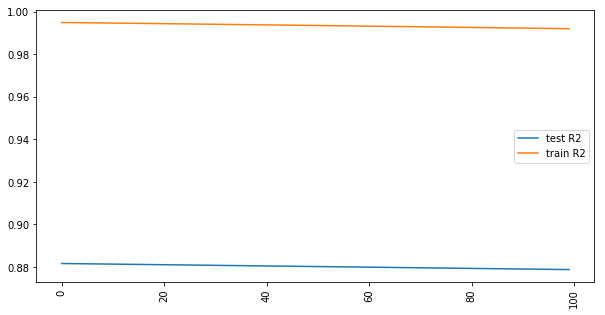

In [176]:
ridge_df = pd.DataFrame(gspipe_ridge_results)
plt.figure(figsize=(10,5)) 
plt.xticks(rotation='vertical')
plt.plot(range(len(ridge_df)), ridge_df.mean_test_score, label='test R2')
plt.plot(range(len(ridge_df)), ridge_df.mean_train_score, label='train R2')
plt.legend()

# Lasso Complexity Curve

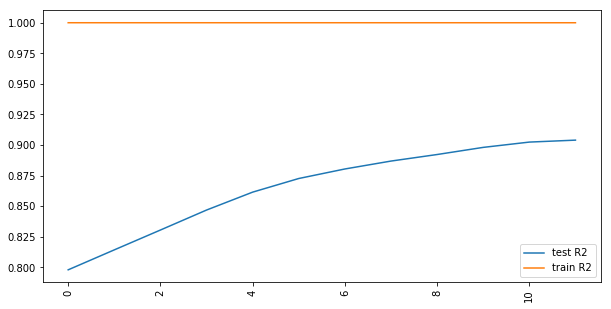

In [175]:
lasso_df = pd.DataFrame(gspipe_lasso_results)
plt.figure(figsize=(10,5)) 
plt.xticks(rotation='vertical')
plt.plot(range(len(lasso_df)), lasso_df.mean_test_score, label='test R2')
plt.plot(range(len(lasso_df)), lasso_df.mean_train_score, label='train R2')
plt.legend()

# KNN Complexity Curve

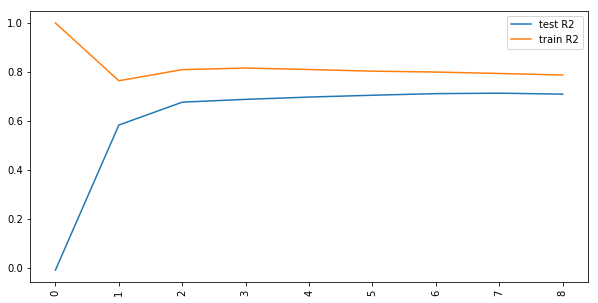

In [174]:
KNN_df = pd.DataFrame(gspipe_KNN_results)
plt.figure(figsize=(10,5)) 
plt.xticks(rotation='vertical')
plt.plot(range(len(KNN_df)), KNN_df.mean_test_score, label='test R2')
plt.plot(range(len(KNN_df)), KNN_df.mean_train_score, label='train R2')
plt.legend()